In [1]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import struct
from lmfit import minimize, Parameters
%matplotlib notebook

In [2]:
dt = [('mark','V4'), ('event', '<i2'), ('ch', 'u1'), ('rssi', 'i1'), ('dt', 'i4'), 
      ('num', 'u1'), ('iq', 'i1', 164), ('end', 'S2') ]
                                                      

In [61]:
data = np.fromfile('connectionless_20ms_chmap.dat', dtype=dt)

In [62]:
data


array([(b'\xFF\xFF\xFF\xFF', 2889, 1, 11, 655, 164, [  62, -108,  -99,  -77,  -93,   83,   68,  104,  113,  -51,  -34, -120, -124,   11,  -10,  124,   44, -117,  -82,   93,  108,  -63, -122,   25,  124,   15, -113,  -53,   94,   82,  -59, -109,   21,  123,   18, -123,  -56,  111,   92,  -83, -113,   53,  124,  -15, -122,  -24,  108,   62,  -81,  -95,   47,  115,   -8, -124,  -33,  120,   68, -104,  -99,   75,  117,  -41, -124,    6,  120,   35, -103,  -70,   76,   99,  -39, -119,   -1,  125,   46, -116,  -76,   99,  104,  -69, -121,   32,  124,   12, -114,  -50,   96,   80,  -61, -109,   28,  122,   12, -124,  -51,  113,   86,  -90, -109,   60,  123,  -18, -123,  -17,  110,   58,  -84,  -92,   53,  112,  -14, -124,  -25,  122,   57, -111,  -92,   84,  114,  -51, -125,    9,  121,   31, -105,  -67,   79,   96,  -44, -117,    2,  125,   35, -120,  -72,  102,  102,  -71, -119,   35,  125,    2, -117,  -41,   99,   75,  -68, -104,   31,  121,   10, -124,  -49,  115,   82,  -94, -108,   61,

In [ ]:
plt.figure()
plt.plot(data['dt'],'.')
656/32768

In [63]:
np.unique(data['ch'], return_counts=True)

(array([0, 1], dtype=uint8), array([1959, 2041]))

In [69]:
np.where(data['ch']==0)[0][:10]

array([ 2,  4,  5,  6, 10, 12, 16, 17, 19, 23])

In [74]:
def fix(mod):
    fix = mod>(np.pi/2)
    mod[fix] = mod[fix] - np.pi
    return mod

def model(params, x):
    m = params['m']
    b = params['b']

    model = np.mod(m*x+b, np.pi)
    # model = fix(model) 
    return model

def residual(params, x, data):
    m = params['m']
    b = params['b']

    model = np.mod(m*x+b, np.pi)
    #model = fix(model)
    return (data-model)*(x+1)

<IPython.core.display.Javascript object>


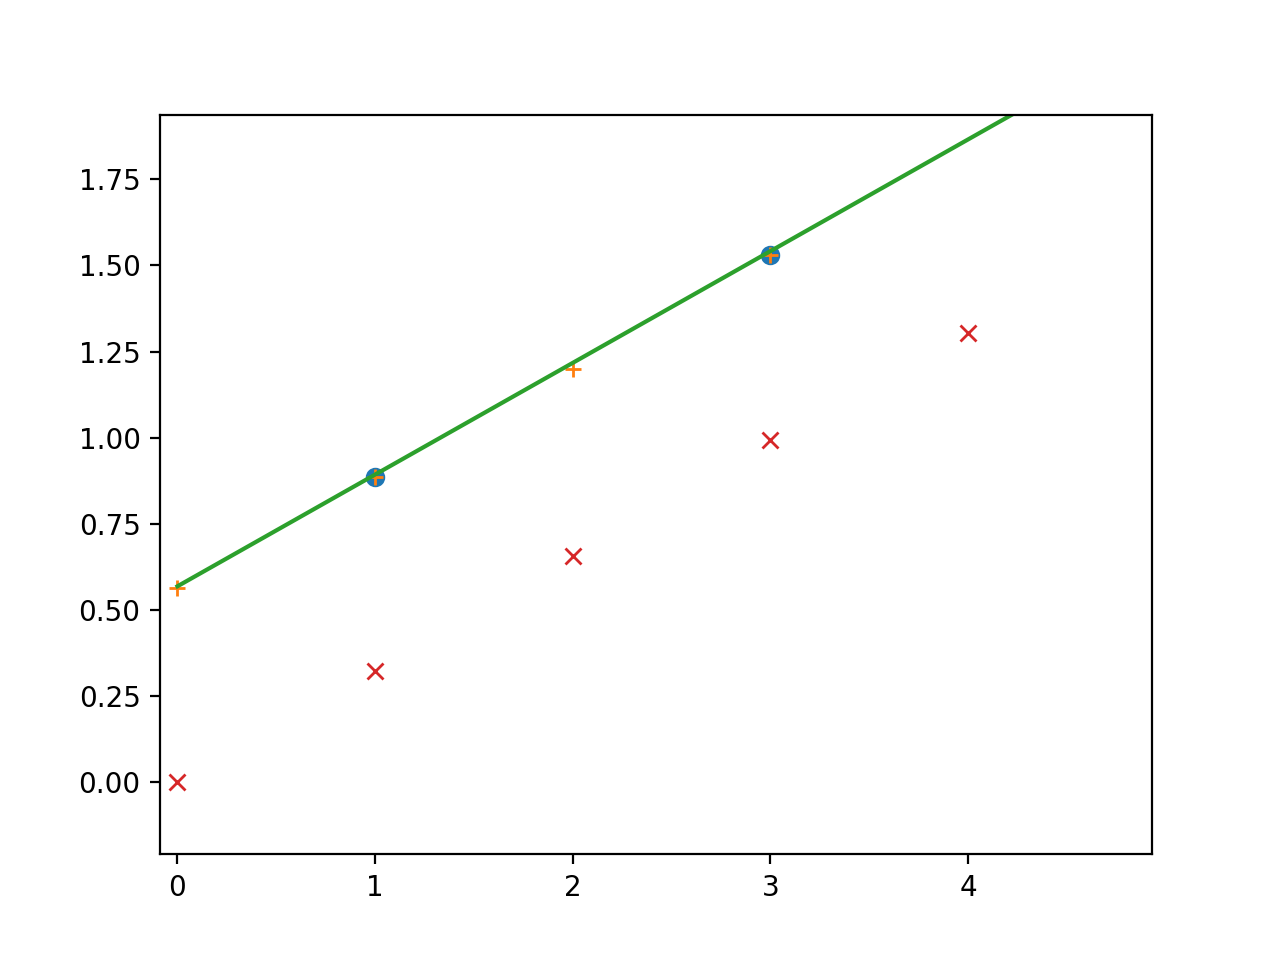

0.3241763010618285


In [213]:
idx = [2, 4]
start = 16
i = data[idx[0]]['iq'][start::2]
q = data[idx[0]]['iq'][(start+1)::2]
#plt.plot(i,q)
plt.figure()
plt.clf()
plt.plot(np.arctan2(q,i),'o')
plt.plot(np.arctan(q/i),'+')

phi_measured = np.mod(np.arctan(q/i), np.pi)
x = np.arange(len(phi_measured)) 

if True:
    params = Parameters()
    # params.add('m', value=0.2, min=-0.5, max=0.5, brute_step=0.01)
    # params.add('b', value=phi_measured[0], min = -np.pi/2, max=np.pi/2, brute_step=0.01)

    # out = minimize(residual, params, method='brute', args=(x, phi_measured))
    # out2 = minimize(residual, out.params, method='leastsq', args=(x, phi_measured))
    if True:
        params.add('m', value=0.32, min=-0.4, max=0.4, brute_step=0.001)
        params.add('b', value=phi_measured[0], min = -np.pi/2, max=np.pi/2, brute_step=0.01)

        out2 = minimize(residual, params, method='differential_evolution', args=(x, phi_measured))

        plt.plot(x, model(out2.params, x))

        m = out2.params['m'].value
    # m = 0.3235
    print(m)
    phase_offset = m*20 * (idx[1]-idx[0]) * 1e3
    phase_offset

    i = data[idx[1]]['iq'][start::2]
    q = data[idx[1]]['iq'][(start+1)::2]
    #plt.plot(i,q)
    phi_measured = np.mod(np.arctan(q/i) + phase_offset, np.pi)
    phi_measured = fix(phi_measured)
    # plt.plot(np.arctan2(q,i),'o')
    plt.plot(phi_measured,'x')
    out2

<IPython.core.display.Javascript object>


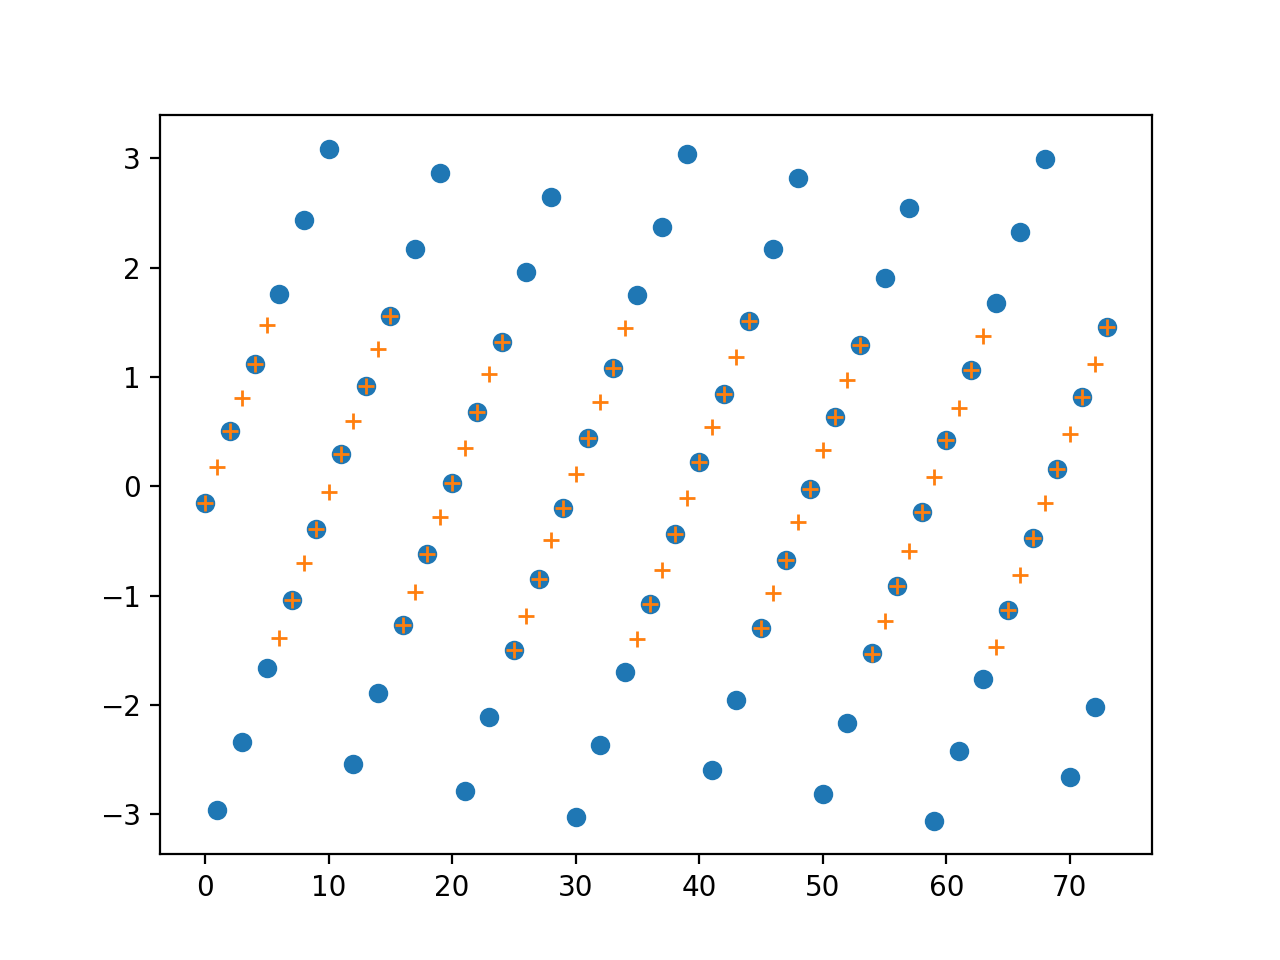

In [105]:
plt.figure(1)
plt.clf()
plt.plot(np.arctan2(q,i),'o')
plt.plot(np.arctan(q/i),'+')
plt.show()

In [70]:
#out2 = minimize(residual, out.params, method='leastsq', args=(x, phi_measured))
out2

In [ ]:
params = Parameters()
params.add('m', value=0.2, min=-0.5, max=0.5, brute_step=0.01)
params.add('b', value=phi_measured[0], min = -np.pi/2, max=np.pi/2, brute_step=0.01)

out = minimize(residual, params, method='brute', args=(x, phi_measured))
out2 = minimize(residual, out.params, method='leastsq', args=(x, phi_measured))
plt.plot(x, model(out2.params, x))

In [ ]:
phase_offset = out2.params['m'].value*25 * (idx[1]-idx[0]) * 1e3
phase_offset

In [ ]:
i = data[idx[1]]['iq'][start::2]
q = data[idx[1]]['iq'][(start+1)::2]
#plt.plot(i,q)
phi_measured = np.mod(np.arctan(q/i) + phase_offset, np.pi)

phi_measured = fix(phi_measured)
# plt.plot(np.arctan2(q,i),'o')
plt.plot(np.arctan(q/i),'x')

In [ ]:
1639/32768*1000

In [ ]:
if True:
    i = data[idx[1]]['iq'][start::2]
    q = data[idx[1]]['iq'][(start+1)::2]
    #plt.plot(i,q)
    phi_measured = np.mod(np.arctan(q/i) + phase_offset, np.pi)
    
    phi_measured = fix(phi_measured)
    # plt.plot(np.arctan2(q,i),'o')
    plt.figure()
    plt.clf()
    plt.plot(phi_measured,'x')

In [309]:
def model(params, x):
    m = params['m']
    b = params['b']

    model = np.mod(m*x+b, np.pi)
    return model

def residual(params, x, data):
    m = params['m']
    b = params['b']

    model = np.mod(m*x+b, np.pi)
    return (data-model)  # *(x+1)

def fit_slopes():
    slope = []
    for idx in range(100):
        start = 16
        i = data[idx]['iq'][start::2]
        q = data[idx]['iq'][(start+1)::2]
        #plt.plot(i,q)
        # plt.figure(1)
        # plt.clf()
        # plt.plot(np.arctan2(q,i),'o')
        # plt.plot(np.arctan(q/i),'+')

        phi_measured = np.mod(np.arctan2(q, i), np.pi)
        x = np.arange(len(phi_measured)) 
        params = Parameters()
        params.add('m', value=0.32, min=0.2, max=0.4, brute_step=0.001)
        params.add('b', value=phi_measured[0], min = -np.pi/2, max=np.pi/2, brute_step=0.01)

        done = False
        while not done:
            out = minimize(residual, params, method='differential_evolution', args=(x, phi_measured))
            #out = minimize(residual, out.params, method='basinhopping', args=(x, phi_measured))
            if out.chisqr < 1:
                done = True
            else:
                print("loop again", out.params['m'], out.chisqr)
                params = out.params
        fit_result = [data[idx]['ch'], out.params['m'].value, out.chisqr]
        slope.append(fit_result)
        # print(idx, fit_result)
        # print(slope[-2], slope[-1])
    return slope
slope = fit_slopes()

loop again <Parameter 'm', value=0.32647178664514875, bounds=[0.2:0.4], brute_step=0.001> 9.174980059357164


In [308]:
slope = np.array(slope)

fig = go.Figure(data=go.Scatter(y=slope[:,1], mode='markers'))
x = np.arange(slope.shape[0])
ch1 = slope[:,0] == 1

fig.add_trace(go.Scatter(x=x[ch1], y=slope[ch1, 1],
                    mode='markers'))
m = slope[:,1].mean()
print(m)
fig

0.32372679550710504


<IPython.core.display.Javascript object>


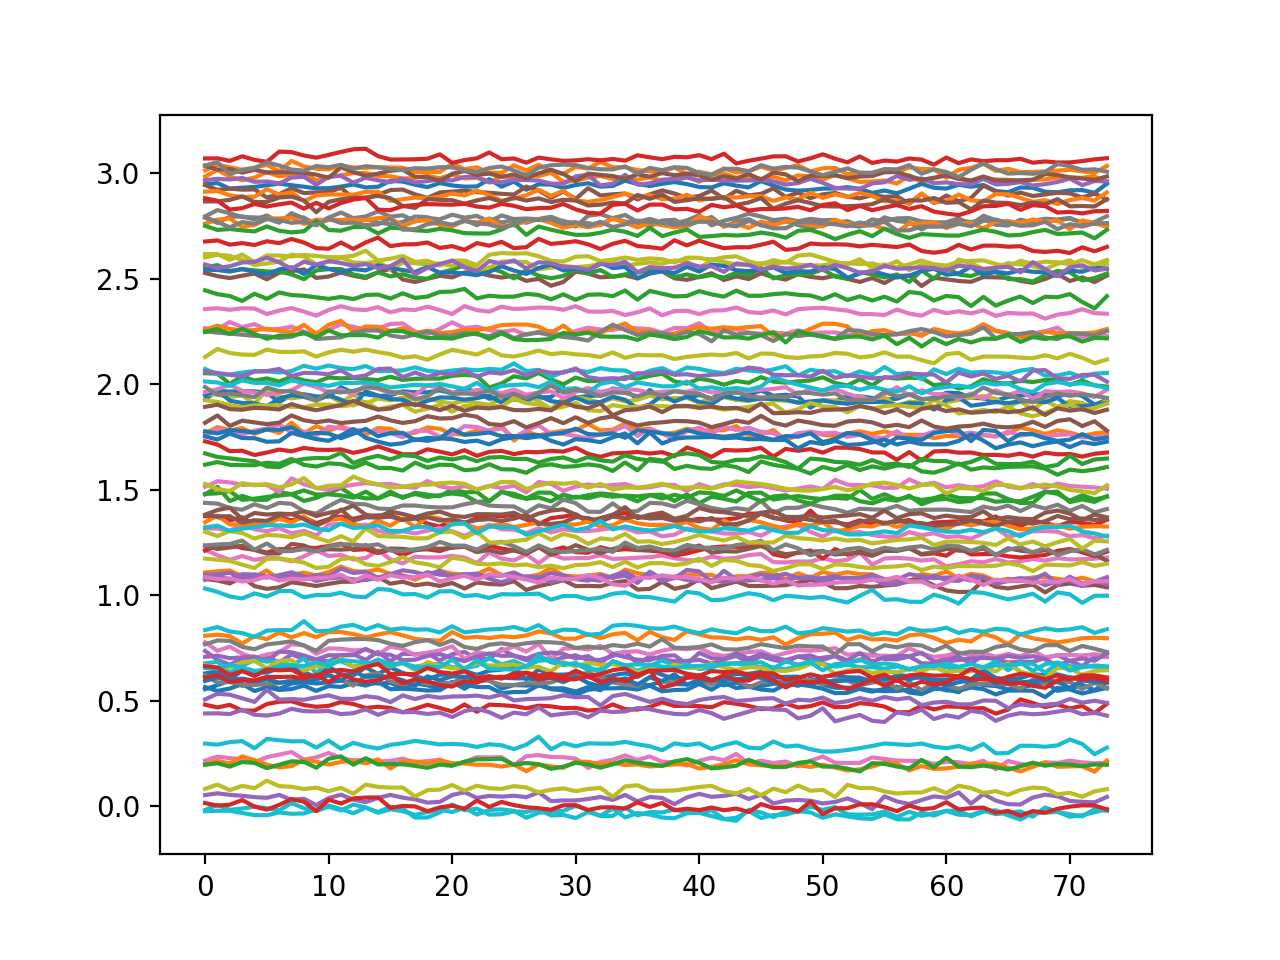

In [299]:
idx_list = range(10)
idx_list = np.where(data['ch']==1)[0][:100]
# idx_list = [4,5]
m = 0.323427
m = slope[:,1].mean()
# m = slope[slope[:,0]==1,1].mean()
start = 16
plt.figure()
plt.clf()
meany=[]
for idx in idx_list:
    i = data[idx]['iq'][start::2]
    q = data[idx]['iq'][(start+1)::2]
    y = np.mod(np.arctan2(q,i), np.pi)
    x = np.arange(len(i)) 
    y = np.mod(y-m*(x+20*1e3*idx), np.pi)
    if sum(y>3) > 0:
        if sum(y<1) > 0:
            if (sum(y>3) + sum(y<1))==len(y):
                y[y>3] = y[y>3] - np.pi
    sum(y<1)
    plt.plot(x,y)
    meany.append(y.mean())

<IPython.core.display.Javascript object>


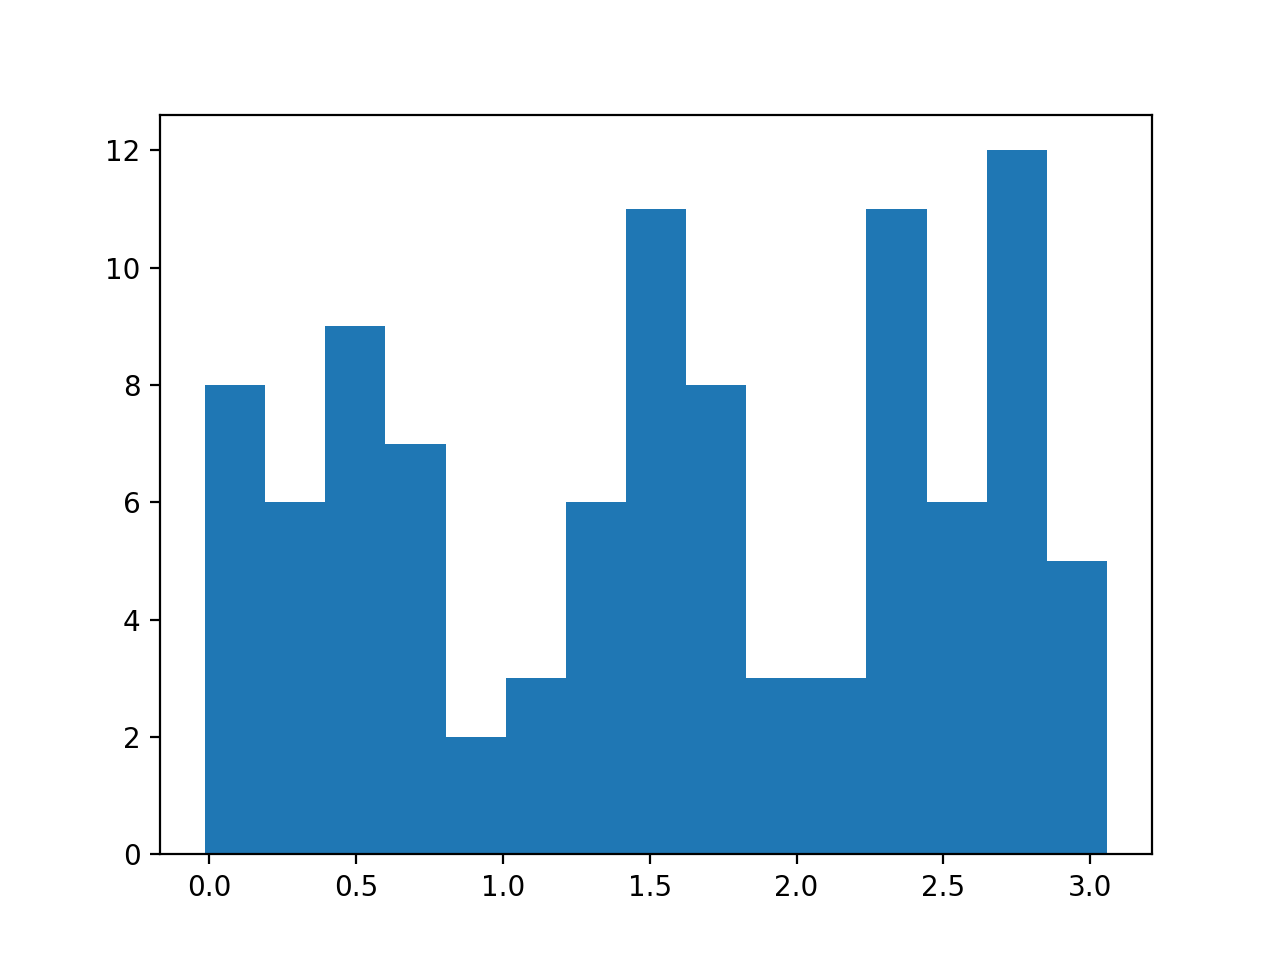

(array([ 8.,  6.,  9.,  7.,  2.,  3.,  6., 11.,  8.,  3.,  3., 11.,  6.,
        12.,  5.]),
 array([-0.01407474,  0.19063124,  0.39533722,  0.60004319,  0.80474917,
         1.00945515,  1.21416112,  1.4188671 ,  1.62357308,  1.82827906,
         2.03298503,  2.23769101,  2.44239699,  2.64710296,  2.85180894,
         3.05651492]),
 <a list of 15 Patch objects>)

In [291]:
plt.figure()
plt.clf()
plt.hist(meany,15)

In [ ]:
np.array(slope[1::2]).mean()

In [ ]:
def plot_idx(idx, fig):
    start = 16
    i = data[idx]['iq'][start::2]
    q = data[idx]['iq'][(start+1)::2]
    phi_measured = np.arctan(q/i)
    x = np.arange(len(phi_measured)) 

    new_phi = np.mod(phi_measured - mean_slope * (25e-3/1e-6 * idx + x), np.pi)
    new_phi = fix(new_phi)

    fig.data

    fig.show()
    return fig

In [ ]:
print('This text appears above the figures')
fig1 = plt.figure(num='DORMANT')
#print('This text appears betweeen the figures')
fig2 = plt.figure()
print('This text appears below the figures')

fig1.canvas.set_window_title('Canvas active title')
fig1.suptitle('Figure title', fontsize=20)

# Create plots inside the figures
ax1 = fig1.add_subplot(111)
ax1.set_xlabel('x label')
# ax2 = fig2.add_subplot(111)

end = 4000
mean_phi = []
for idx in range(end):
    # ax2.cla()  # Clear only 2nd figure's axes, figure 1 is ADDITIVE
    ax1.set_title('Axes title')  # Reset as removed by cla()

    # if False:  
    start = 16
    i = data[idx]['iq'][start::2]
    q = data[idx]['iq'][(start+1)::2]
    phi_measured = np.arctan(q/i)
    x = np.arange(len(phi_measured)) 

    new_phi = np.mod(phi_measured - mean_slope * (25e-3/1e-6 * idx + x), np.pi)
    new_phi = fix(new_phi)
    mean_phi.append(new_phi.mean())
    ax1.cla()
    ax1.plot(x, new_phi)
    ax1.set_title(idx)
    # ax1.plot(range(i,end), (i,)*(end-i))
    # ax2.plot(range(i,end), range(i,end), 'rx')
    # fig1.canvas.draw()
    # time.sleep(0.1)
    #fig2.canvas.draw()


In [ ]:
mean_phi = []
for idx in range(end):
    # ax2.cla()  # Clear only 2nd figure's axes, figure 1 is ADDITIVE
    ax1.set_title('Axes title')  # Reset as removed by cla()

    # if False:  
    start = 16
    i = data[idx]['iq'][start::2]
    q = data[idx]['iq'][(start+1)::2]
    phi_measured = np.arctan(q/i);
    x = np.arange(len(phi_measured)) 

    new_phi = np.mod(phi_measured - mean_slope * (25e-3/1e-6 * idx + x), np.pi)
    new_phi = fix(new_phi)
    mean_phi.append(new_phi.mean())

In [ ]:
plt.figure()
plt.plot(np.array(mean_phi)[data['ch']==0], '-o')

In [ ]:
mean_phi[np.where(data['ch']==0)[0]]

In [ ]:
data['event']

In [ ]:
np.diff(data['event']).sum()

In [ ]:
data = np.fromfile('connectionless_20ms_2ft.dat', dtype=dt)
#plt.figure()
hmap = []
for i in range(37):
    cut = data['ch']==i
    hist = np.unique(data['rssi'][cut], return_counts=True)
    z = np.zeros(110)
    z[hist[0]] = hist[1]
    hmap.append(z)
hmap = np.array(hmap)
fig = go.Figure(data=go.Heatmap(z=hmap.T))
fig

#plt.plot(data['ch'], data['rssi'],'.',markersize=1)

In [100]:
def residual(params, x, data):
    m = params['m']
    b = params['b']

    model = np.mod(m*x+b, np.pi)
    model = fix(model)
    return (data-model) *(x+1)

params.add('m', value=0.32, min=-0.4, max=0.4, brute_step=0.001)
params.add('b', value=phi_measured[0], min = -np.pi/2, max=np.pi/2, brute_step=0.01)

#out = minimize(residual, params, method='brute', args=(x, phi_measured))
out2 = minimize(residual, params, method='basinhopping', args=(x, phi_measured))
out2

/Users/nams/anaconda3/envs/py37/lib/python3.7/site-packages/scipy/optimize/optimize.py:1058: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


In [92]:
dd

NameError: name 'dd' is not defined

In [ ]:
z[hist[0]]

In [ ]:
hist[1]

In [ ]:
z[hist[0]] = hist[1]

In [122]:
a = b'\xff'*4+b'123456'+b'\xff'*4
a.find(b'\xff'*4,0)

0

<IPython.core.display.Javascript object>


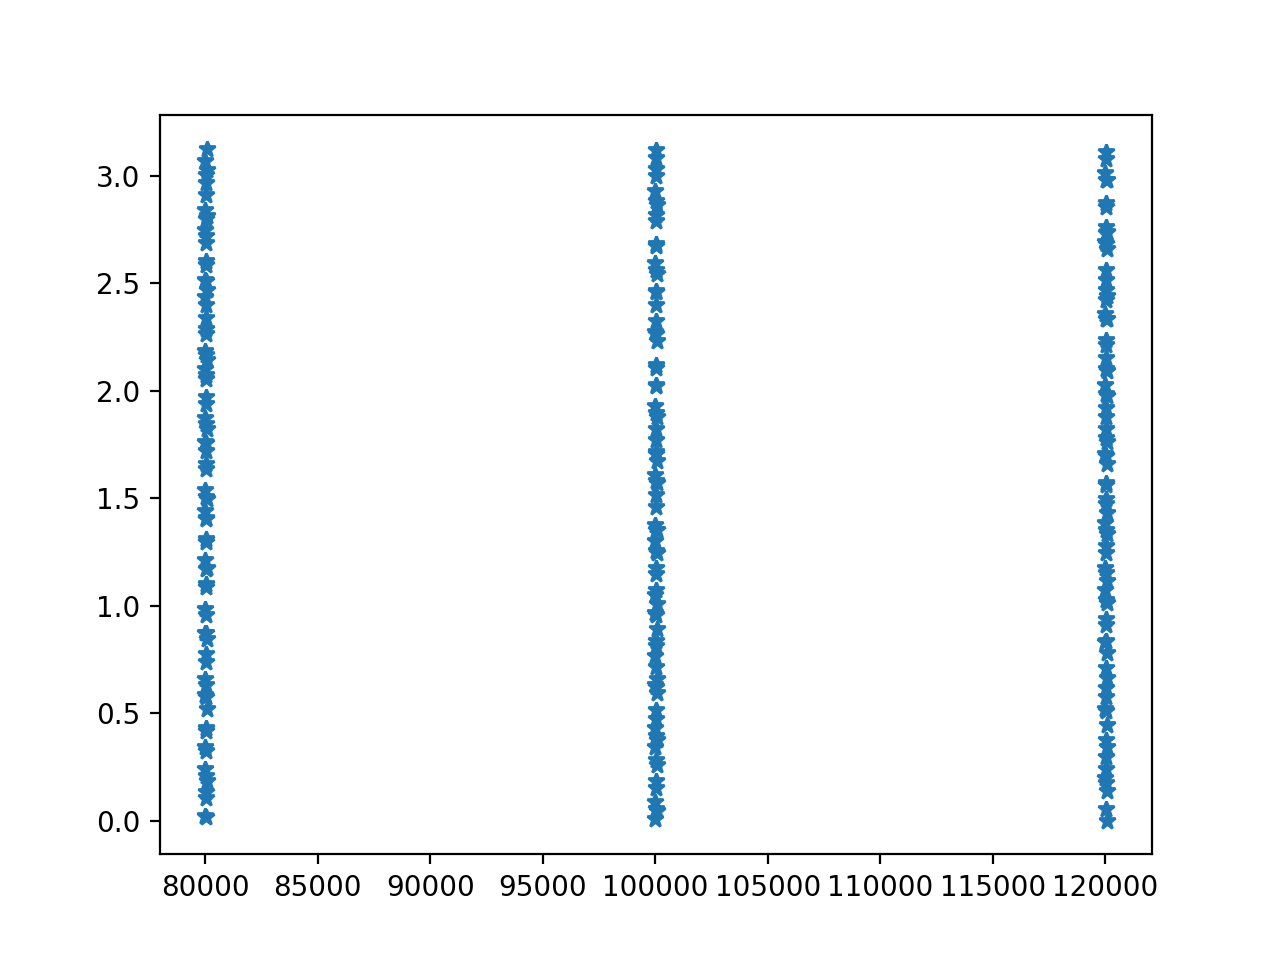

<IPython.core.display.Javascript object>


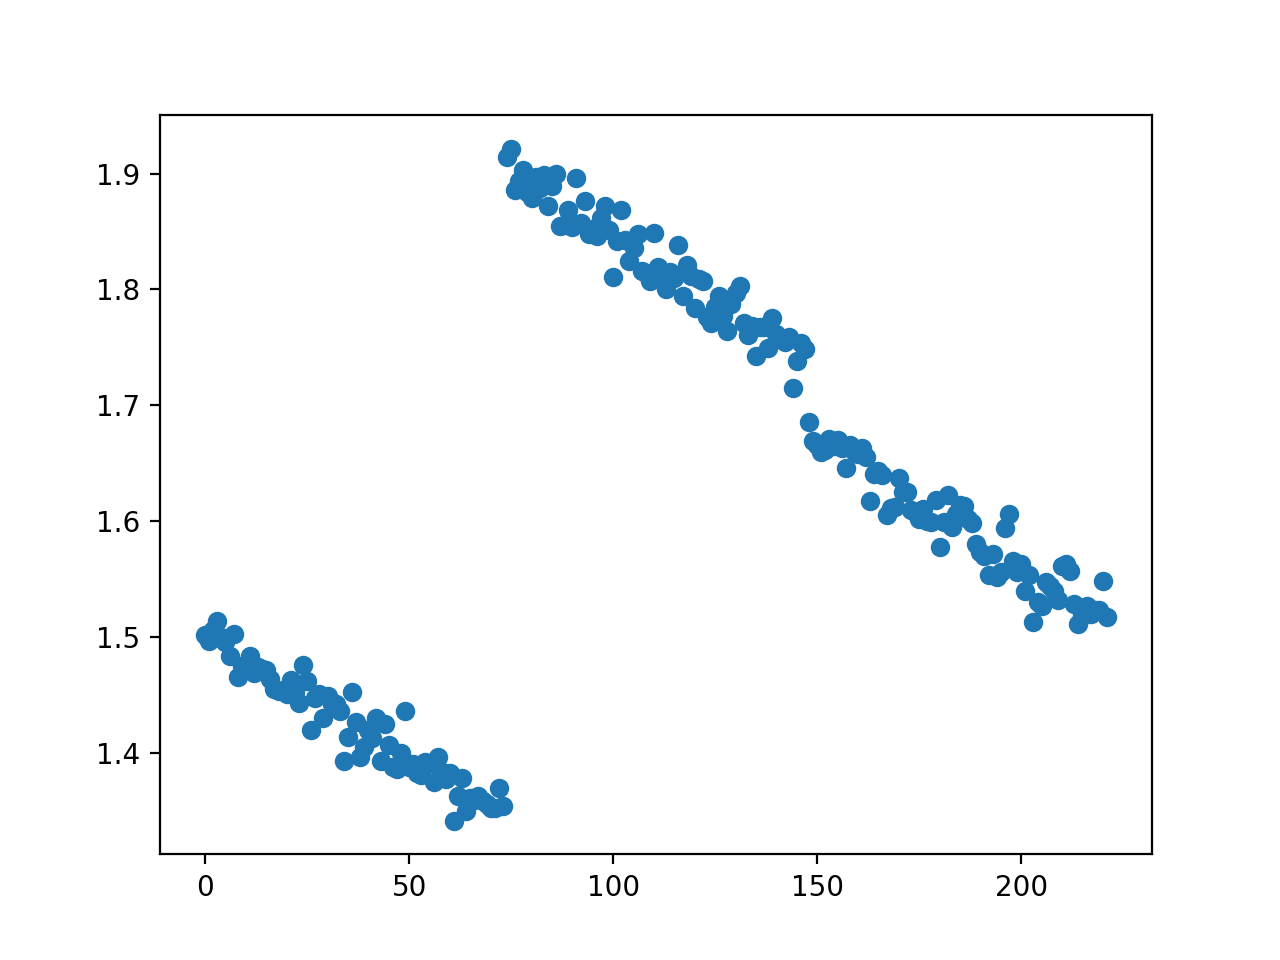

In [166]:
start = 8*2
idx = 0
x=np.array([])
y=np.array([])
idx_list = [0, 1, 3]
idx_list = [4, 5, 6]
for idx in idx_list:
    i = data[idx]['iq'][start::2]
    q = data[idx]['iq'][(start+1)::2]
    #plt.plot(i,q)

    #plt.plot(np.arctan2(q,i),'o')
    #plt.plot(np.arctan(q/i),'+')
    y = np.hstack([y, np.mod(np.arctan2(q,i), np.pi)])
    x = np.hstack([x, np.arange(len(i)) + 20e3*idx])
plt.figure()
plt.clf()


plt.plot(x,y,'*')

def model(params, x):
    m = params['m']
    b = params['b']

    model = np.mod(m*x+b, np.pi)
    return model

def residual(params, x, data):
    m = params['m']
    b = params['b']

    model = np.mod(m*x+b, np.pi)
    return (data-model)

params.add('m', value=0.35, min=0.3, max=0.4, brute_step=0.001)
params.add('b', value=phi_measured[0], min = -np.pi/2, max=np.pi/2, brute_step=0.01)

#out = minimize(residual, params, method='brute', args=(x, phi_measured))
out2 = minimize(residual, params, method='basinhopping', args=(x, y))
# out2.params['m'].value = 0.32061890

plt.figure()
#plt.plot(y,'o')
phi_offset = np.pi/2
plt.plot(np.mod(y-model(out2.params, x)+phi_offset, np.pi),'o')

In [165]:
out2.params

name,value,initial value,min,max,vary,brute step
m,0.32242055,0.35,0.30000000,0.40000000,True,1.0000e-03
b,0.21131551,0.4317722605661629,-1.57079633,1.57079633,True,0.01000000


In [218]:
np.mod((m - slope[:,1].mean())*20000, np.pi)

2.710539297941237

In [214]:
m - 0.3241763010618285

0.0